<a href="https://colab.research.google.com/github/rahulrkumar9000/Datascience/blob/master/ImageSimilarity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install -U turicreate

     |████████████████████████████████| 91.8MB 54kB/s 
     |████████████████████████████████| 327kB 46.3MB/s 
     |████████████████████████████████| 3.4MB 33.4MB/s 
     |████████████████████████████████| 86.3MB 44kB/s 
     |████████████████████████████████| 450kB 47.4MB/s 
     |████████████████████████████████| 3.8MB 31.5MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=c5349da8afb4c039d4bb2826c889863531f3566a8c0631950cce681b96d143c3
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6a0369969825fe8c4e00e6802be1b4e0587cd683b2067fa0558df0340848954d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
  Found existing installation: resampy 0.2.2
    Uninstalling resampy-0.2.2:
      Successfully uninstalled resampy-0.2.

In [0]:
!ls "/content/drive/My Drive"

 CAX
 CAX_LogFacies_Submission_File1.csv
 CAX_LogFacies_Submission_File.csv
'Chap 10.zip'
 chap11.zip
 chap3.zip
 chap4.zip
 chap5.zip
'Colab Notebooks'
 commsdata.sas7bdat
'CV_Rahul 2.7.pdf'
'CV_Rahul Kumar_v2.92.pdf'
'CV_Rahul Kumar_v2.991.pdf'
'CV_Rahul Kumar_v2.994.pdf'
 data.csv
'Data- Pothole Detection'
 Dataset
'DCAL Abstract.zip'
'Getting started.pdf'
'new doc 2019-12-04 18.03.40-20191204180731.pdf'
'Project: Mentor Workshop Journal.gdoc'
 Results
 test
 test.csv
 train
 VGG16.h5
 VGG16v1.h5
 VGG19.h5
 VikramChaudhary1312.pdf


In [0]:
import turicreate as tc

# Load images from the downloaded data
reference_data  = tc.image_analysis.load_images('/content/drive/My Drive/train')
reference_data = reference_data.add_row_number()

# Save the SFrame for future use
reference_data.save('./sim.sframe')

Read 24 images in 5.04809 secs	speed: 4.75427 file/sec

,id,path,image
0,0,/content/drive/My Drive/train/asparagus1_resized.jpeg,
1,1,/content/drive/My Drive/train/asparagus2_resized.jpg,
2,2,/content/drive/My Drive/train/asparagus3_resized.jpg,
3,3,/content/drive/My Drive/train/asparagus4_resized.jpeg,
4,4,/content/drive/My Drive/train/asparagus5_resized.jpg,
5,5,/content/drive/My Drive/train/asparagus6_resized.jpeg,
6,6,/content/drive/My Drive/train/burger1_resized.jpeg,
7,7,/content/drive/My Drive/train/burger2_resized.jpg,
8,8,/content/drive/My Drive/train/burger3_resized.jpeg,
9,9,/content/drive/My Drive/train/burger4_resized.jpeg,

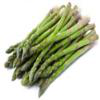
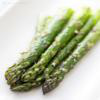
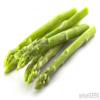
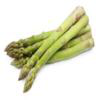
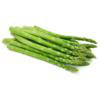
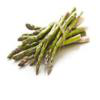
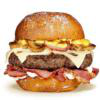
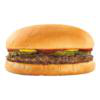
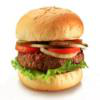
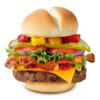
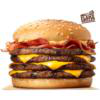
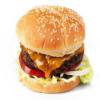
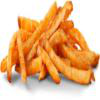
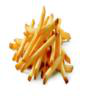
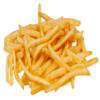
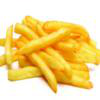
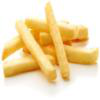
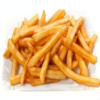
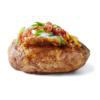
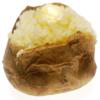
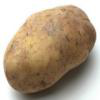
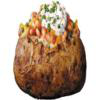
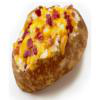
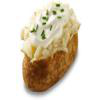
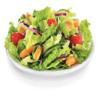
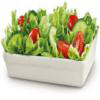
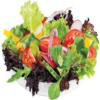
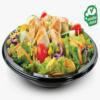
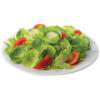
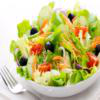
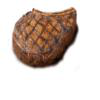
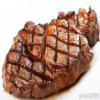
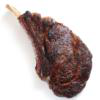
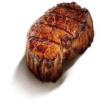
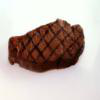
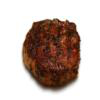

In [0]:
reference_data.explore()

In [0]:
model = tc.image_similarity.create(reference_data)

Instructions for updating:
non-resource variables are not supported in the long term
Download completed: /var/tmp/model_cache/resnet-50-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed 36/36


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [0]:
query_results = model.query(reference_data[0:10], k=10)
query_results.head()

Performing feature extraction on resized images...
Completed 10/10


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 10      | 2.77778     | 7.92ms       |

| Done         |         | 100         | 15.586ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,0,0.0,1
0,3,17.77591139128158,2
0,5,19.207078503397142,3
0,2,20.22066673490733,4
0,32,21.137840795395633,5
0,1,21.476163346243347,6
0,4,21.924139846664428,7
0,34,22.329685253560832,8
0,15,22.487185881314808,9
0,21,22.845680527729932,10


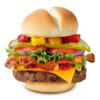

In [0]:
reference_data[9]['image'].show()

,id,path,image
0,6,/content/drive/My Drive/train/burger1_resized.jpeg,
1,7,/content/drive/My Drive/train/burger2_resized.jpg,
2,8,/content/drive/My Drive/train/burger3_resized.jpeg,
3,9,/content/drive/My Drive/train/burger4_resized.jpeg,
4,10,/content/drive/My Drive/train/burger5_resized.jpg,
5,11,/content/drive/My Drive/train/burger6_resized.jpeg,
6,24,/content/drive/My Drive/train/salad1_resized.jpeg,
7,25,/content/drive/My Drive/train/salad2_resized.jpeg,
8,27,/content/drive/My Drive/train/salad4_resized.jpg,
9,28,/content/drive/My Drive/train/salad5_resized.jpeg,

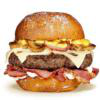
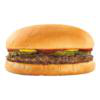
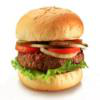
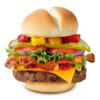
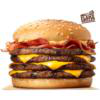
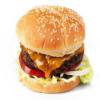
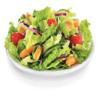
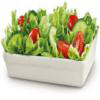
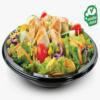
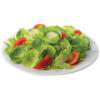

In [0]:
similar_rows = query_results[query_results['query_label'] == 9]['reference_label']
reference_data.filter_by(similar_rows, 'id').explore()

In [0]:
similarity_graph = model.similarity_graph(k=10)
similarity_graph

Starting blockwise similarity graph construction.

max rows per data block: 6207

number of reference data blocks: 2

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 324     | 33.3333     | 3.019ms      |

| 972     | 100         | 8.892ms      |

+---------+-------------+--------------+

SGraph({'num_edges': 360, 'num_vertices': 36})
Vertex Fields:['__id']
Edge Fields:['__src_id', '__dst_id', 'distance', 'rank']

In [0]:
similar_images = similarity_graph.edges

In [0]:
sm=similar_images.to_dataframe

In [0]:
import pandas as pd

In [0]:
data= pd.DataFrame(similar_images)

In [0]:
data.to_csv("/content/drive/My Drive/data.csv")

In [0]:
!ls "/content/drive/My Drive"

 CAX
 CAX_LogFacies_Submission_File1.csv
 CAX_LogFacies_Submission_File.csv
'Chap 10.zip'
 chap11.zip
 chap3.zip
 chap4.zip
 chap5.zip
'Colab Notebooks'
 commsdata.sas7bdat
'CV_Rahul 2.7.pdf'
'CV_Rahul Kumar_v2.92.pdf'
'CV_Rahul Kumar_v2.991.pdf'
'CV_Rahul Kumar_v2.994.pdf'
'Data- Pothole Detection'
 Dataset
'DCAL Abstract.zip'
'Getting started.pdf'
'new doc 2019-12-04 18.03.40-20191204180731.pdf'
'Project: Mentor Workshop Journal.gdoc'
 Results
 test
 test.csv
 train
 VGG16.h5
 VGG16v1.h5
 VGG19.h5
 VikramChaudhary1312.pdf


In [0]:
model.save('./image_similarity.model')